
----
# Cuaderno 10 - Introducción al aprendizaje no supervisado y al clustering
## Ariel Palazzesi - 2026
----

Hasta ahora, hemos trabajado con algoritmos supervisados, es decir, modelos que aprenden a partir de ejemplos donde conocemos la "respuesta correcta" (por ejemplo, si una persona sobrevivió al Titanic o no).

En esta oportunidad vamos a explorar un nuevo enfoque: **el aprendizaje no supervisado**. Este tipo de algoritmos no necesita una variable objetivo. En lugar de intentar predecir un valor o una categoría, el objetivo es **descubrir patrones ocultos** en los datos.

Una de las técnicas más utilizadas de este tipo es el **clustering** o agrupamiento. El clustering nos permite dividir los datos en grupos (clusters) formados por observaciones similares entre sí, sin haber definido previamente qué grupos deberían existir.

Vamos a aplicar el algoritmo **K-Means**, una herramienta simple y poderosa para segmentar los datos y revelar estructuras internas. Usaremos el dataset del Titanic para intentar descubrir grupos de pasajeros con características similares.



## Aprendizaje no supervisado, clustering y K-Means

Este cuaderno implica **un cambio conceptual fuerte**, asi que comencemos con algo de teoría.

Hasta ahora trabajamos con **aprendizaje supervisado**, donde los datos incluyen una variable objetivo que el modelo intenta predecir. En el **aprendizaje no supervisado**, en cambio, **no existe una variable objetivo**. El algoritmo no recibe respuestas correctas durante el entrenamiento, sino que trabaja únicamente con las características de los datos para **descubrir patrones ocultos**.

El objetivo del aprendizaje no supervisado no es predecir, sino **explorar y comprender la estructura interna de los datos**. Este enfoque es útil cuando no se conocen de antemano las categorías existentes, o cuando se quiere analizar grandes volúmenes de información sin etiquetas previas.

---

### Clustering o agrupamiento

Una de las técnicas más importantes del aprendizaje no supervisado es el **clustering** o **agrupamiento**. El clustering consiste en dividir un conjunto de datos en grupos llamados *clusters*, de manera tal que:

* las observaciones dentro de un mismo cluster sean **similares entre sí**,
* y diferentes de las observaciones que pertenecen a otros clusters.

Lo importante es que estos grupos **no están definidos previamente**. El algoritmo es quien decide cuántos grupos existen (o cómo organizarlos) basándose únicamente en las características de los datos y en una medida de similitud.

Un ejemplo sería agrupar clientes de una tienda según sus hábitos de compra. Sin decirle al algoritmo qué tipo de clientes existen, el clustering puede encontrar grupos como “compradores frecuentes”, “compradores ocasionales” o “clientes de alto gasto”, simplemente analizando patrones en los datos.

---

### El algoritmo K-Means

**K-Means** es uno de los algoritmos de clustering más utilizados y conocidos. Su objetivo es dividir los datos en un número fijo de clusters, indicado por el valor **K**, que debe definirse antes de ejecutar el algoritmo.

La idea básica de K-Means es representar cada cluster mediante un punto central llamado **centroide**, que puede interpretarse como el “promedio” de las observaciones que pertenecen a ese grupo. El algoritmo funciona de manera iterativa siguiendo un proceso sencillo:

1. Se eligen inicialmente K centroides (generalmente de forma aleatoria).
2. Cada observación se asigna al centroide más cercano, formando así los clusters.
3. Se recalculan los centroides como el promedio de los puntos asignados a cada cluster.
4. Este proceso se repite hasta que los centroides dejan de moverse o cambian muy poco.

El resultado final es una partición de los datos en K grupos, donde cada observación pertenece al cluster cuyo centroide está más cerca según una medida de distancia (habitualmente la distancia euclidiana).

---

### Interpretación y uso

K-Means es un algoritmo **simple, eficiente y fácil de entender**, lo que lo convierte en una excelente puerta de entrada al aprendizaje no supervisado. Sin embargo, tiene algunas limitaciones importantes: requiere definir previamente el valor de K, es sensible a la escala de las variables y puede verse afectado por la elección inicial de los centroides.

A pesar de estas limitaciones, K-Means se utiliza ampliamente para **segmentación de clientes**, análisis exploratorio, reducción de complejidad de datos y como paso previo a modelos más complejos.

En Python, como ya habrás adivinado, el algoritmo K-Means se implementa en scikit-learn siguiendo la misma filosofía que otros modelos: se ajusta con `fit()` y se utiliza para asignar clusters con `predict()`, manteniendo una interfaz coherente con el resto del ecosistema de Machine Learning.

## Carga del dataset y selección de variables

Vamos a cargar el dataset del Titanic desde la carpeta de trabajo de Google Colab. Ya conocemos este dataset: contiene información sobre los pasajeros del Titanic como edad, clase, tarifa pagada, género, etc.

Como el algoritmo K-Means requiere datos numéricos, vamos a seleccionar algunas variables que ya han sido transformadas previamente y que sean útiles para hacer agrupamientos. En este caso usaremos:

- `Age`: Edad del pasajero
- `Fare`: Tarifa pagada
- `Pclass`: Clase del pasajero (1ª, 2ª, 3ª)
- `SibSp`: Número de hermanos/esposas a bordo
- `Parch`: Número de padres/hijos a bordo

Antes de aplicar el algoritmo, nos aseguraremos de eliminar las filas con valores faltantes.


In [ ]:
# Importamos las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Cargamos el dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Seleccionamos solo las columnas numéricas que vamos a usar para clustering
columnas_cluster = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']
df_cluster = df[columnas_cluster].copy()

# Eliminamos filas con valores faltantes
df_cluster.dropna(inplace=True)

# Mostramos las primeras filas del dataset reducido
df_cluster.head()


,Age,Fare,Pclass,SibSp,Parch
0,22.0,7.2500,3,1,0
1,38.0,71.2833,1,1,0
2,26.0,7.9250,3,0,0
3,35.0,53.1000,1,1,0
4,35.0,8.0500,3,0,0


## Normalización de los datos

Antes de aplicar el algoritmo K-Means, necesitamos asegurarnos de que todas las variables estén en la misma escala.

Por ejemplo, la columna `Fare` tiene valores que pueden superar los 500, mientras que `Parch` suele moverse entre 0 y 5. Si no escalamos los datos, el modelo podría considerar que la variable `Fare` es mucho más importante que las demás, simplemente porque tiene números más grandes.

Para evitar esto, vamos a utilizar `StandardScaler`, que transforma los datos para que cada variable tenga media 0 y desviación estándar 1.


In [ ]:
# Creamos una instancia del escalador
scaler = StandardScaler()

# Aplicamos la transformación
datos_normalizados = scaler.fit_transform(df_cluster)

# Mostramos una pequeña muestra de los datos transformados
pd.DataFrame(datos_normalizados, columns=columnas_cluster).head()


,Age,Fare,Pclass,SibSp,Parch
0,-0.530377,-0.518978,0.911232,0.524570,-0.505895
1,0.571831,0.691897,-1.476364,0.524570,-0.505895
2,-0.254825,-0.506214,0.911232,-0.551703,-0.505895
3,0.365167,0.348049,-1.476364,0.524570,-0.505895
4,0.365167,-0.503850,0.911232,-0.551703,-0.505895


## ¿Cómo elegir el valor de K en K-Means?

Elegir el valor de **K** (la cantidad de clusters) es una de las decisiones más importantes al utilizar el algoritmo K-Means. A diferencia del aprendizaje supervisado, en clustering **no existe una respuesta correcta única**, ya que no conocemos de antemano cuántos grupos “reales” hay en los datos. Por eso, la elección de K combina análisis, criterio y comprensión del problema.

Desde una mirada intuitiva, K representa **cuántos grupos queremos distinguir** dentro del conjunto de datos. Si elegimos un valor de K muy pequeño, forzamos al algoritmo a agrupar observaciones distintas dentro de un mismo cluster. Si elegimos un valor demasiado grande, terminamos separando los datos en grupos muy pequeños que pueden perder sentido práctico.

---

### Ejemplo:

Imaginemos que queremos agrupar personas según su edad.

* Si elegimos **K = 1**, todas las personas quedan en un solo grupo, lo cual no aporta información.
* Si elegimos **K = 2**, podríamos obtener grupos como “jóvenes” y “adultos”.
* Si elegimos **K = 4**, podríamos distinguir “niños”, “jóvenes”, “adultos” y “adultos mayores”.
* Si elegimos **K = 20**, probablemente estemos creando grupos demasiado específicos, difíciles de interpretar y poco útiles.

La clave está en encontrar un valor de K que **simplifique la realidad sin perder información relevante**.

---

### El “punto justo”

Una forma intuitiva de pensar K es buscar un equilibrio entre:

* **simplicidad**, es decir, pocos clusters fáciles de interpretar,
* y **detalle**, es decir, suficientes clusters como para capturar diferencias importantes entre los datos.

Un buen valor de K suele ser aquel en el que agregar más clusters **ya no aporta una mejora significativa** en la separación de los datos, sino que solo divide grupos existentes en subgrupos muy similares.

---

### El método del codo

Una técnica muy utilizada para elegir K es el llamado **método del codo**. Conceptualmente, consiste en observar cómo mejora la compactación de los clusters a medida que aumentamos K.

Al principio, al pasar de K = 1 a K = 2 o 3, la mejora suele ser grande. Sin embargo, llega un punto en el que aumentar K produce mejoras cada vez más pequeñas. Ese punto donde el beneficio comienza a disminuir notablemente se conoce como el *codo*, y suele ser un buen candidato para elegir K.

No se trata de una regla exacta, sino de una **herramienta orientativa** que ayuda a tomar una decisión razonable.

---

### La importancia del contexto

Finalmente, es importante remarcar que el valor de K no depende solo de los datos, sino también del **objetivo del análisis**. En segmentación de clientes, por ejemplo, puede ser más útil tener pocos grupos claros que muchos grupos difíciles de explicar. En otros contextos exploratorios, un mayor nivel de detalle puede ser aceptable.

En clustering, elegir K es parte del proceso de análisis y no un paso puramente automático. Comprender el problema y el significado de los clusters es tan importante como el resultado del algoritmo.

Ya estamos listos: veamos como funciona todo esto con nuestro dataframe.

## Aplicación de K-Means con k = 2

Vamos a aplicar el algoritmo K-Means para dividir a los pasajeros en dos grupos.

Este valor de `k` es un primer intento, útil para explorar si hay una división clara entre los datos, como por ejemplo entre pasajeros con mayores recursos y los de tercera clase, o entre quienes viajaban solos y quienes iban en familia.

Luego visualizaremos los resultados y evaluaremos si esta cantidad de grupos es adecuada.


In [ ]:
# Creamos el modelo con k=2
kmeans_2 = KMeans(n_clusters=2, random_state=0)

# Ajustamos el modelo a los datos normalizados
kmeans_2.fit(datos_normalizados)

# Obtenemos las etiquetas asignadas a cada pasajero
etiquetas_2 = kmeans_2.labels_

# Agregamos las etiquetas al DataFrame original
df_cluster['Grupo_K2'] = etiquetas_2

# Mostramos una muestra de los resultados
df_cluster.head()


,Age,Fare,Pclass,SibSp,Parch,Grupo_K2
0,22.0,7.2500,3,1,0,0
1,38.0,71.2833,1,1,0,1
2,26.0,7.9250,3,0,0,0
3,35.0,53.1000,1,1,0,1
4,35.0,8.0500,3,0,0,0


## Visualización de los grupos formados con k = 2

Vamos a graficar los resultados del clustering usando dos variables como ejes (por ejemplo, `Age` y `Fare`) para observar cómo se distribuyen los pasajeros en los dos grupos encontrados por `K-Means`.

Esta visualización puede ayudarnos a detectar patrones generales, como si un grupo agrupa pasajeros jóvenes con pasajes baratos y el otro agrupa a mayores con pasajes más costosos.


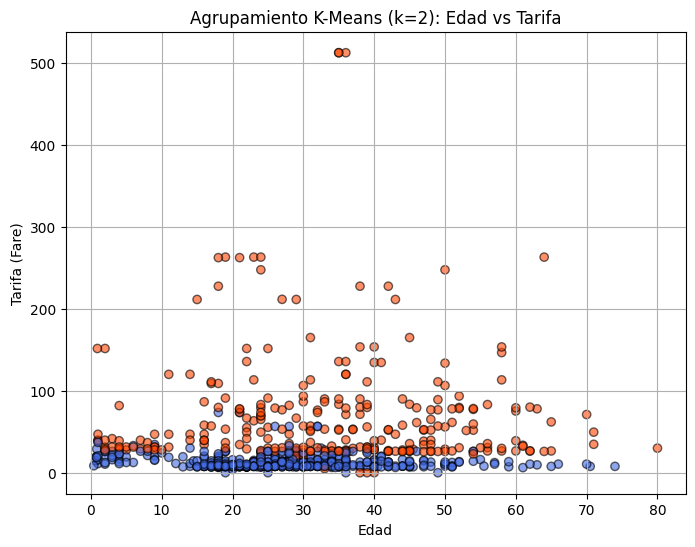

In [ ]:
import matplotlib.pyplot as plt

# Asignamos colores según el grupo
colores = ['royalblue', 'orangered']
grupo_colores = [colores[i] for i in df_cluster['Grupo_K2']]

# Creamos el gráfico
plt.figure(figsize=(8, 6))
plt.scatter(df_cluster['Age'], df_cluster['Fare'], c=grupo_colores, alpha=0.6, edgecolor='k')
plt.xlabel('Edad')
plt.ylabel('Tarifa (Fare)')
plt.title('Agrupamiento K-Means (k=2): Edad vs Tarifa')
plt.grid(True)
plt.show()


## Evaluar el valor óptimo de k

Ya aplicamos `K-Means` con k=2 y observamos los grupos generados. A simple vista, parece que la variable *Fare* (tarifa pagada) influye fuertemente en la separación de los grupos, más que la *Age* (edad). Esto tiene sentido si consideramos que en el Titanic el precio del pasaje estaba muy asociado a la clase social, y por lo tanto también a factores como la ubicación en el barco o las probabilidades de supervivencia.

Sin embargo, esta primera impresión visual no alcanza para saber si elegimos una buena cantidad de grupos. Para eso, vamos a utilizar dos métricas que nos ayudan a evaluar qué tan bien está funcionando el algoritmo para distintos valores de **k**:

**1. Inercia (Suma de distancias cuadradas):** mide qué tan compactos son los grupos. A menor inercia, más juntos están los datos dentro de cada grupo. Sin embargo, esta métrica siempre disminuye al aumentar k, por lo que se suele usar el “método del codo” para buscar un punto de quiebre.

**2. Índice de Silhouette:** mide qué tan bien definidos están los grupos. Va de -1 a 1: valores cercanos a 1 indican buenos agrupamientos; cercanos a 0 indican que los grupos se superponen; y negativos que muchos datos están mal agrupados.

Vamos a calcular ambas métricas para diferentes valores de k, y así evaluar si k=2 era realmente una buena elección... o si hay mejores alternativas.


In [ ]:
from sklearn.preprocessing import StandardScaler

# Seleccionamos las columnas que vamos a usar
columnas_cluster = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']
X_df = df_cluster[columnas_cluster]

# Escalamos
scaler = StandardScaler()
X_scaled_df = pd.DataFrame(scaler.fit_transform(X_df), columns=columnas_cluster)



In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Eliminamos filas con valores faltantes
X_limpio = X_scaled_df.dropna()

# Convertimos a array NumPy
X_scaled = X_limpio.values

inertias = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

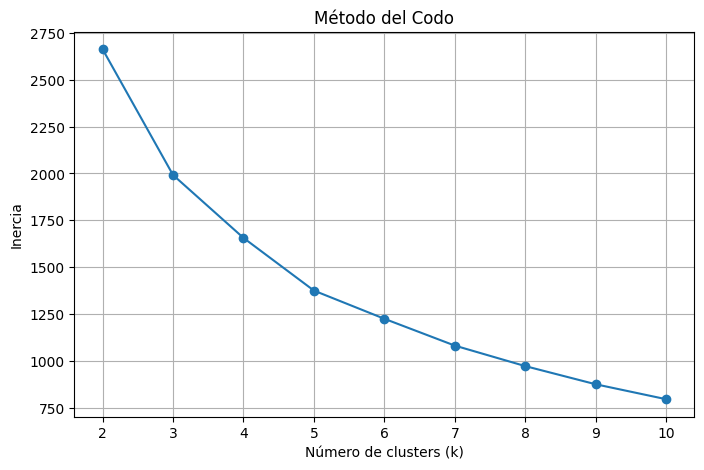

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.xticks(k_range)
plt.grid(True)
plt.show()


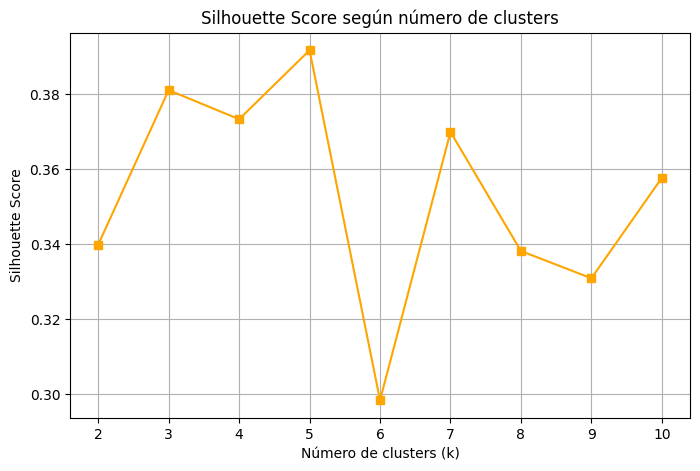

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='s', color='orange')
plt.title('Silhouette Score según número de clusters')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)
plt.show()


### ¿Qué nos dicen los gráficos?

- En el **gráfico de inercia**, se observa una caída pronunciada hasta *k=3* o *k=4*. A partir de allí, la disminución es más suave, lo que sugiere que el “codo” podría estar en esos valores. Esto indica que a partir de ese punto, sumar más grupos no mejora significativamente la compacidad.

- En el **gráfico de Silhouette Score**, el valor máximo se alcanza con *k=5*, seguido de puntajes también altos en *k=3* y *k=4*. En cambio, el score baja considerablemente en *k=6*, lo que indica que los grupos empiezan a solaparse o perder definición.


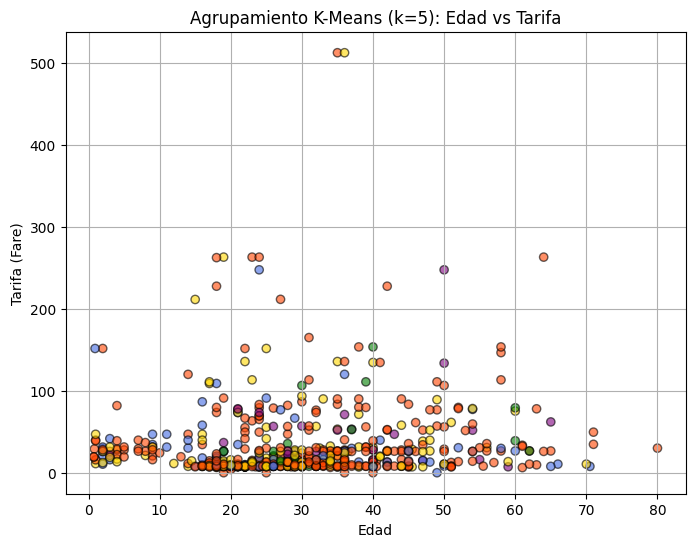

In [ ]:
# Creamos un nuevo modelo con k=5
kmeans_k5 = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_k5.fit(X_scaled)

# Creamos una copia del DataFrame original, pero solo con las filas sin nulos
df_clustering = df.loc[X_limpio.index].copy()

# Agregamos las etiquetas resultantes al DataFrame limpio
df_clustering["Grupo_K5"] = kmeans_k5.labels_

# Gráfico de dispersión: Edad vs Tarifa, coloreado por grupo
colores = ['royalblue', 'orangered', 'green', 'purple', 'gold']
colores_k5 = [colores[i] for i in df_clustering["Grupo_K5"]]

plt.figure(figsize=(8, 6))
plt.scatter(df_clustering["Age"], df_clustering["Fare"], c=colores_k5, alpha=0.6, edgecolor='k')
plt.xlabel("Edad")
plt.ylabel("Tarifa (Fare)")
plt.title("Agrupamiento K-Means (k=5): Edad vs Tarifa")
plt.grid(True)
plt.show()



## Análisis del agrupamiento con K=5


El gráfico anterior muestra el resultado del agrupamiento usando **Edad** y **Tarifa (Fare)** como variables. Cada punto representa a una persona, y los colores indican a qué grupo fue asignada por el algoritmo.

A simple vista, se puede observar que los grupos no están definidos principalmente por la edad, sino más bien por la **tarifa pagada**. Esto es razonable si consideramos que, en el dataset del Titanic, la tarifa está estrechamente relacionada con la **clase social** del pasajero y, en consecuencia, con su **ubicación en el barco**, sus **posibilidades de supervivencia** y otros factores relevantes.

Este análisis nos permite descubrir **agrupamientos latentes** que no fueron explícitamente definidos en los datos originales, y nos brinda una herramienta potente para explorar estructuras ocultas en los datos.


Ambas métricas coinciden en señalar que *k=5* es una elección razonable.  
La inercia muestra una mejora aceptable y el Silhouette Score alcanza su valor más alto, lo que sugiere que el agrupamiento con cinco grupos es compacto y bien definido.

Además, considerando el contexto del dataset del Titanic, es razonable pensar que puede haber múltiples subgrupos relacionados con edad, clase social o tarifa pagada. Explorar el modelo con *k=5* podría permitir descubrir patrones más detallados.

## Conclusión y cierre

En este cuaderno conocimos al **aprendizaje no supervisado** a través del algoritmo **K-Means**, una técnica fundamental de *clustering* que permite descubrir patrones y estructuras ocultas en los datos sin necesidad de etiquetas previas.

A lo largo del cuaderno:

- Aprendimos a **preparar los datos** correctamente para aplicar K-Means (incluyendo la estandarización).

- Aplicamos el modelo con distintos valores de `k`, evaluando los resultados mediante las métricas **inercia** e **índice silhouette**.
- Analizamos la **distribución de los grupos** en función de variables como edad y tarifa, generando visualizaciones que nos ayudaron a interpretar los clusters obtenidos.

El gráfico final de dispersión con `k=5` muestra cómo el modelo logra segmentar a los pasajeros según ciertos perfiles, que pueden sugerir diferencias en el comportamiento de compra o condiciones del viaje.

>  Más allá de los números, el valor del clustering reside en su capacidad de ofrecer **nuevas miradas sobre los datos**, generando *insights* que pueden resultar clave para la toma de decisiones.

Con este cueaderno cerramos una etapa, y nos preparamos para avanzar hacia herramientas más complejas de automatización y optimización del flujo de trabajo con *pipelines*.